## <div style="background-color: #BAE3BC; padding: 10px;"><b>Exercicis d'algoritmes d'Agrupació</b>

</div>

### Exercici 1

Descarrega el dataset adjunt, de registres de publicacions a Facebook sobre Tailàndia, i classifica els diferents registres utilitzant l'algorisme de K-means.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from sklearn import preprocessing
import warnings
warnings.filterwarnings("ignore")

!pip install kneed

### <div style="background-color: #D3DDF7; padding: 10px;"><b>Importem el dataset</b>

</div>

In [2]:
df = pd.read_csv('Publicacions Facebook Thailandia.csv')
df.sample(15)

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
3496,134115277150304_188768661684965,photo,10/30/2017 0:42,5,3,0,5,0,0,0,0,0,NaN,NaN,NaN,NaN
2651,134115277150304_267828460445651,photo,6/9/2018 4:03,14,0,0,14,0,0,0,0,0,NaN,NaN,NaN,NaN
1001,246675545449582_855133564603774,photo,12/9/2015 1:47,131,0,0,131,0,0,0,0,0,NaN,NaN,NaN,NaN
5012,614855718638584_838128642977956,photo,5/28/2018 1:50,20,0,0,20,0,0,0,0,0,NaN,NaN,NaN,NaN
2785,134115277150304_255834018311762,photo,5/7/2018 3:29,19,0,0,19,0,0,0,0,0,NaN,NaN,NaN,NaN
5843,614855718638584_671405286316960,video,12/10/2017 7:05,385,1651,489,230,146,2,4,2,1,NaN,NaN,NaN,NaN
461,246675545449582_1147875258662935,photo,12/21/2016 0:10,272,9,0,264,6,2,0,0,0,NaN,NaN,NaN,NaN
836,246675545449582_926475434136253,video,4/1/2016 6:00,119,31,2,119,0,0,0,0,0,NaN,NaN,NaN,NaN
5898,614855718638584_666570553467100,photo,12/5/2017 7:34,15,0,0,14,1,0,0,0,0,NaN,NaN,NaN,NaN
4076,848451358648417_960356214124597,video,5/10/2018 3:32,1,0,0,1,0,0,0,0,0,NaN,NaN,NaN,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   status_id         7050 non-null   object 
 1   status_type       7050 non-null   object 
 2   status_published  7050 non-null   object 
 3   num_reactions     7050 non-null   int64  
 4   num_comments      7050 non-null   int64  
 5   num_shares        7050 non-null   int64  
 6   num_likes         7050 non-null   int64  
 7   num_loves         7050 non-null   int64  
 8   num_wows          7050 non-null   int64  
 9   num_hahas         7050 non-null   int64  
 10  num_sads          7050 non-null   int64  
 11  num_angrys        7050 non-null   int64  
 12  Column1           0 non-null      float64
 13  Column2           0 non-null      float64
 14  Column3           0 non-null      float64
 15  Column4           0 non-null      float64
dtypes: float64(4), int64(9), object(3)
memory 

In [4]:
df.isnull().sum()

status_id              0
status_type            0
status_published       0
num_reactions          0
num_comments           0
num_shares             0
num_likes              0
num_loves              0
num_wows               0
num_hahas              0
num_sads               0
num_angrys             0
Column1             7050
Column2             7050
Column3             7050
Column4             7050
dtype: int64

In [5]:
df.isna().sum()

status_id              0
status_type            0
status_published       0
num_reactions          0
num_comments           0
num_shares             0
num_likes              0
num_loves              0
num_wows               0
num_hahas              0
num_sads               0
num_angrys             0
Column1             7050
Column2             7050
Column3             7050
Column4             7050
dtype: int64

<AxesSubplot:>

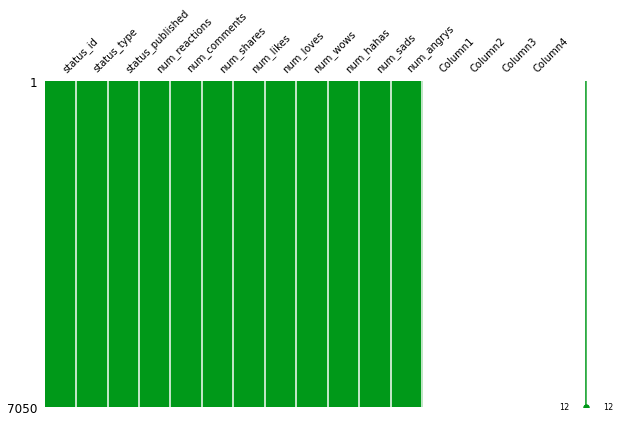

In [6]:
msno.matrix(df, color=(0.0, 0.6, 0.1), figsize=(10,6),fontsize=10)

In [7]:
df['status_type'].nunique()

4

In [8]:
df['status_type'].unique()

array(['video', 'photo', 'link', 'status'], dtype=object)

### Descripció preliminar de dades

Això és un dataset on podem trobar mètriques de Facebook a Thailandia. Entre les columnes podem veure les següents coses:

   1. Un identificador **status_id**, que ens parla de qui ha fet l'interacció.
   2. Una columna **status_type**, que ens indica el tipus de la publicació (['video', 'photo', 'link', 'status'])
   3. Un altre columna que ens informa de la data de la publicació incloent la seva hora **status_published**.
   4. També tenim les reaccions totals que ha provocat la publicació amb **num_reactions**. Això correspon a la suma de les reaccions/emocions ('loves','wows','hahas','sads','angrys').
   5. El nombre de comentaris que s'han feta la publicació **num_comments**.
   6. El nombre de vegades en què s'ha compartit la publicació **num_shares**.
   7. També tenim el nombre de cops en què la gent ha expressat el seu gust per la publicació **num_likes**.
   8. Desprès tenim el desglossament (en cinc camps per separat) de la quantitat de cops en què s'ha expressat cada tipus de reacció/emoció, que ja hem comentat en el punt quatre + '**num_likes**'.
   9. Finalment tenim quatre camps que semblen buits ('**Column1**','**Column2**','**Column3**','**Column4**')
   
Ara farem una exploració més acurada del dataset i pensarem en convertir, eliminar o redistribuir variables segons calgui.

### <div style="background-color: #D3DDF7; padding: 10px;"><b>Exploració del dataset</b>

</div>

Hem vist que tenim quatre columnes sense nom i segons l'informació que hem recollit anteriorment, totes les dades estan buides. Pert tant, les eliminarem.

In [9]:
df = df.drop(columns=['Column1', 'Column2', 'Column3', 'Column4'], axis=1) 

df.head()

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,246675545449582_1649696485147474,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0
1,246675545449582_1649426988507757,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0
2,246675545449582_1648730588577397,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0
3,246675545449582_1648576705259452,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0
4,246675545449582_1645700502213739,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0


Podem veure que la columna "status_id" es troba separada per un guió. Si ens fixem la priemra part (abans del guió) repeteix el seu codi, mentre que la segona part va canviant la numeració. Indagarem ràpidament si ens trobem algun patró. Doncs, primer de tot, separarem el camp pel guió.

In [10]:
df[['id', 'status']] = df['status_id'].str.rsplit(pat='_', expand=True)
df.id.nunique()

9

In [11]:
df.id.unique()

array(['246675545449582', '134115277150304', '146481362756646',
       '117059915488335', '848451358648417', '725980084255106',
       '614855718638584', '819700534875473', '1050855161656896'],
      dtype=object)

In [12]:
df['id'].value_counts()

246675545449582     2635
614855718638584     1440
134115277150304     1212
1050855161656896     778
848451358648417      450
725980084255106      252
146481362756646      125
819700534875473      102
117059915488335       56
Name: id, dtype: int64

In [13]:
df.status.nunique()

6997

*Hem comprovat que, per una banda la primera part (abans del guió) que hem anomenat "id", es repeteix nou vegades en el dataset. D'un altre banda, la part que hem anomenat "status" no repeteix cap registre. Ès a dir, podriem tenir nou institucions/empreses que es reparteixen les publicacions en aquest dataset (segons podem veure amb el 'value_counts'). Això podria ser molt interessant de veure en els clusters de més endavant, però ja veurem si tenim el temps de entrar en aquest anàlisi.*

Tornant el nostre análisi exploratori... La columna "status_id" sembla tenir valors duplicats. Ho calculem!

In [14]:
df.duplicated().sum()

51

Ara ho mirarem des del dataframe per a 10 dels seus 51 registres duplicats ordenats segons data de publicació.

In [15]:
df[df.duplicated(keep=False)].sort_values(by='status_published').head(10)

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,id,status
6220,819700534875473_951614605017398,photo,3/16/2018 1:57,985,71,42,962,5,16,2,0,0,819700534875473,951614605017398
6271,819700534875473_951614605017398,photo,3/16/2018 1:57,985,71,42,962,5,16,2,0,0,819700534875473,951614605017398
6270,819700534875473_953048221540703,photo,3/18/2018 4:28,1985,39,21,1961,11,12,0,1,0,819700534875473,953048221540703
6219,819700534875473_953048221540703,photo,3/18/2018 4:28,1985,39,21,1961,11,12,0,1,0,819700534875473,953048221540703
6269,819700534875473_954387151406810,photo,3/20/2018 1:54,186,15,1,172,3,11,0,0,0,819700534875473,954387151406810
6218,819700534875473_954387151406810,photo,3/20/2018 1:54,186,15,1,172,3,11,0,0,0,819700534875473,954387151406810
6217,819700534875473_955149101330615,photo,3/21/2018 1:15,114,6,1,108,3,3,0,0,0,819700534875473,955149101330615
6268,819700534875473_955149101330615,photo,3/21/2018 1:15,114,6,1,108,3,3,0,0,0,819700534875473,955149101330615
6267,819700534875473_955743124604546,photo,3/22/2018 3:48,879,165,18,867,4,8,0,0,0,819700534875473,955743124604546
6216,819700534875473_955743124604546,photo,3/22/2018 3:48,879,165,18,867,4,8,0,0,0,819700534875473,955743124604546


Procedirem a eliminar els duplicats. Desprès corroborarem que ho hàgim fet bé.

In [16]:
df = df.drop_duplicates()

print(df.duplicated().sum())
print(df.shape)

0
(6999, 14)


### Decisions abans de continuar amb l'exploració de dades

1. Podria dividir el dataset en quatre grups de variables, que seria interessant de examinar-les en un anàlisi posterior de clusterització:

- 1.1 **status_id** que ja sabem que té un comportament que ve del funcionament de publicacions de institucions/empreses.
- 1.2 **status_type** que ens parla del tipus de publicació fet i que per descomptat pot serd'interés al moment de evaluar clusters.
- 1.3 **status_published** és un camp d'interès perquè pot mostrar temporalitats diferents a les publicacions generant patrons susceptibles d'agrupar.
- 1.4 Per últim tenim totes les mètriques de interaccions i reaccions, que per cert podriem dividir en emocions e interaccions. Això sens dubte és el cor del anàlisid'aquest dataset.
     
Però lamentablemnt i bàsicament per escassetat de temps he de triar només alguns d'aquets grups per poder analitzar futurs clusters. Em quedaré amb els grups que considero abarcables (**status_type** i les mètriques d'interaccions i reaccions) i per tant ara procediré a eliminar les altres.


### Eliminació de variables

In [17]:
df = df.drop(columns=['status_id', 'status_published', 'id', 'status'], axis=1) 

df.head()

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,video,529,512,262,432,92,3,1,1,0
1,photo,150,0,0,150,0,0,0,0,0
2,video,227,236,57,204,21,1,1,0,0
3,photo,111,0,0,111,0,0,0,0,0
4,photo,213,0,0,204,9,0,0,0,0


Mirem la representació de les classes en la variable **status_type**

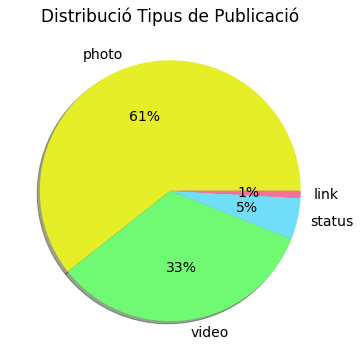

In [18]:
plt.figure(figsize=(8,6))
plt.title('Distribució Tipus de Publicació', fontsize=17)

c = ['#E5EE27', '#70F972', '#70DEF9', '#F97097']

df['status_type'].value_counts().plot(kind='pie',autopct='%.0f%%', shadow=True, colors=c, textprops={'fontsize': 14})
plt.ylabel('')
plt.show()

Veiem que les publicacions de photos i videos són les més recurrents concentrant un 94%, mentre que els links casi no tenen representació (1%) i els status només concentren un 5%. 

In [19]:
reaccions = df.groupby('status_type').sum()[['num_likes','num_loves','num_wows','num_hahas','num_sads','num_angrys']]

reaccions.rename(columns={'num_likes':'Likes',
                          'num_loves':'Loves',
                         'num_wows':'Wows',
                         'num_hahas':'Haha',
                         'num_sads':'Sads',
                         'num_angrys':'Angrys'}, inplace=True)

reaccions

,Likes,Loves,Wows,Haha,Sads,Angrys
status_type,,,,,,
link,23286,19,12,2,0,0
photo,721490,5748,2623,793,536,169
status,157797,549,423,40,126,9
video,566844,82932,5711,4050,966,593


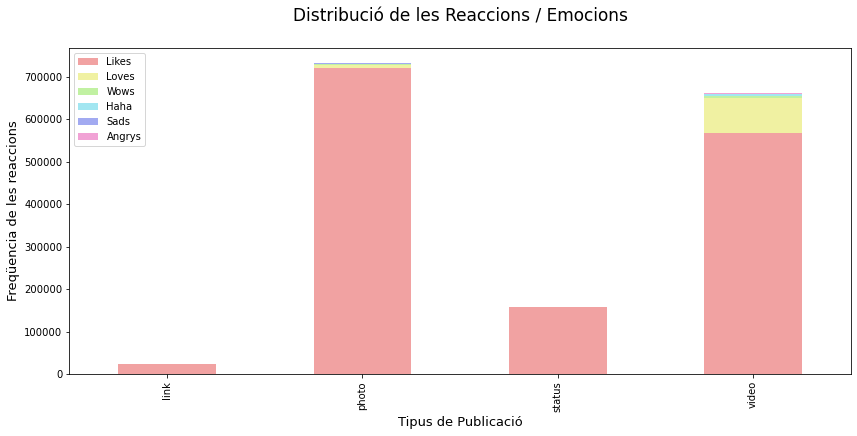

In [20]:
c = ['#F1A2A2', '#F0F1A2', '#C1F1A2', '#A2E6F1','#A2AAF1','#F1A2D5']

reaccions.plot(kind='bar', stacked=True, figsize=(14,6), color=c)

plt.title("Distribució de les Reaccions / Emocions\n", fontsize=17)
plt.ylabel("Freqüencia de les reaccions", fontsize=13)
plt.xlabel("Tipus de Publicació", fontsize=13)
plt.legend(loc='best')
plt.show()

La quantitat de "likes" és desproporcionada respecte de les altres reaccions. Podem veure fàcilment que els likes de les photos i els likes dels videos són els més recurrents. També veiem com els "loves" tenen una part significativa als videos. 

Ara veurem la mateixa gràfica però observant la distribució dels reaccions totals, els comentaris i les vegades en que s'ha compartit la publicació

In [21]:
interaccions = df.groupby('status_type').sum()[['num_reactions','num_comments','num_shares']]

interaccions.rename(columns={'num_reactions':'Reaccions',
                          'num_comments':'Comentaris',
                         'num_shares':'Compartits'}, inplace=True)

interaccions

,Reaccions,Comentaris,Compartits
status_type,,,
link,23319,359,277
photo,731372,65678,10574
status,158944,13078,925
video,661102,1499524,269994


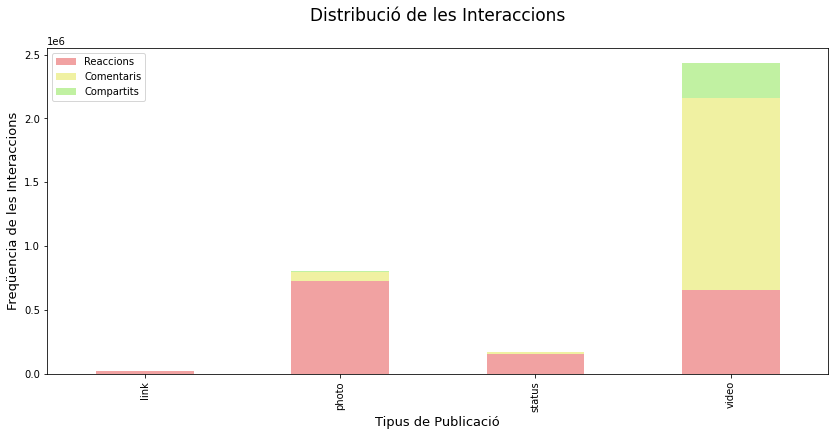

In [22]:
c = ['#F1A2A2', '#F0F1A2', '#C1F1A2']

interaccions.plot(kind='bar', stacked=True, figsize=(14,6), color=c)

plt.title("Distribució de les Interaccions\n", fontsize=17)
plt.ylabel("Freqüencia de les Interaccions", fontsize=13)
plt.xlabel("Tipus de Publicació", fontsize=13)
plt.legend(loc='best')
plt.show()

Podem veure que les reaccions (en vermell) tenen una representació relativa important en tots el tipus de publicació. Una cop les fotos i videos són els tipus de publicació amb més interaccions, però en aquesta oportunitat els videos tenen una major concentració de dades i una distribució diversa de 'reaccions' ,'comentaris' i 'compartits'.

Ara farem una descripció estadística ràpida del dataset abans de començar amb els tests d'hipòtesi i el preprocessament de les variables.

In [23]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
num_reactions,6999.0,224.994571,452.880746,0.0,17.0,58.0,216.0,4710.0
num_comments,6999.0,225.552079,892.743010,0.0,0.0,4.0,22.0,20990.0
num_shares,6999.0,40.258608,132.046903,0.0,0.0,0.0,4.0,3424.0
num_likes,6999.0,209.946707,439.550330,0.0,17.0,57.0,182.0,4710.0
num_loves,6999.0,12.751536,40.106872,0.0,0.0,0.0,3.0,657.0
num_wows,6999.0,1.252893,8.725551,0.0,0.0,0.0,0.0,278.0
num_hahas,6999.0,0.697957,3.970912,0.0,0.0,0.0,0.0,157.0
num_sads,6999.0,0.232605,1.481105,0.0,0.0,0.0,0.0,51.0
num_angrys,6999.0,0.110159,0.688582,0.0,0.0,0.0,0.0,31.0


La taula anterior ens mostra una tendència general cap a desviacions stàndards importants, com en el cas de "num_reactions", "num_comments", "num_shares" entre altres. Ja veiem que tenen valors màxims molt alts i diferències interquartíliques també altes sobretot cap al últim quartil. Hauriem d'esperar llavors una quantit important d'outliers.

Podriem dir previ al test d'hipòtesi o qualsevol gràfica que ens hauríem de trobar moltes distribucions 'no gaussianes'.

Per finalitzar aquest apartat de descripció de dades farem un anàlisi de correlació multivariat per a tot el dataset, previ al preprocessat.

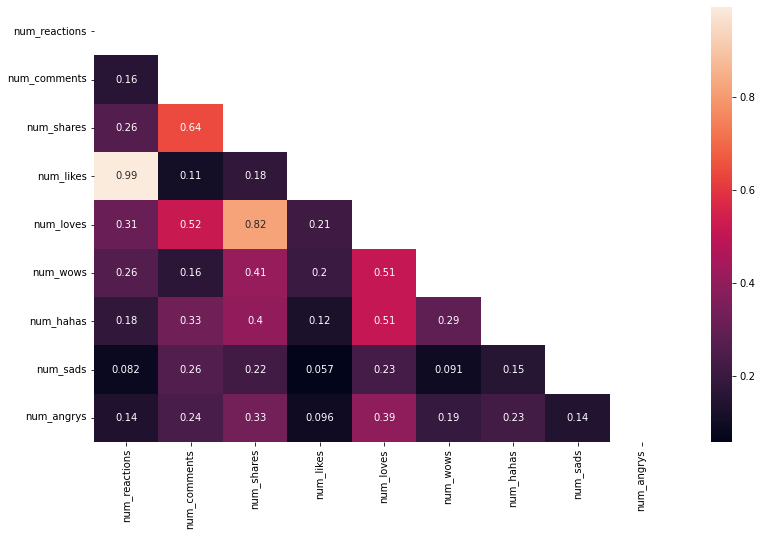

In [24]:
plt.figure(figsize=(13,8))
mask = np.triu(np.ones_like(df.corr()))

sns.heatmap(df.corr(), mask=mask, annot=True)

plt.show()

L'anàlisi de correlació ens mostra un correlació baixa a nivell general entre les diferents combinacions del dataset. Evidentment la correlació entre els likes i les reaccions totals és casi 1, perquè ja hem vist que els likes agafen un  percentatge altíssim de les reacciones. D'un altre banda tenim la correlació entre "num_loves" amb "num_shares" i "num_shares" amb "num_comments". Aquestes relacions són les úniques que desperten cert interès fins ara.

Doncs, ara farem el test de Shapiro per a corroborar quines variables són gaussianes previ al preprocessat. Després farem el preprocessat per acabar de tenir un dataset amb dades numèriques (dummies) i la normalització, estandardització o escalat segons calgui.

### Test D'hipòtesi Shapiro

Comprovarem el següent per tots els atributs del datset:
    
1.    Hipòtesi nul·la (H0): La mostra té una distribució normal
2.    Hipòtesi alternativa (H1): La mostra no té una distribució normal

In [25]:
from scipy import stats
from scipy.stats import shapiro

df_num = df[['num_reactions', 'num_comments',
       'num_shares', 'num_likes', 'num_loves', 'num_wows', 'num_hahas',
       'num_sads', 'num_angrys']]

for i in df_num.columns:
    shapiro_test = stats.shapiro(df_num[i])
    print('La variable',i, "té un p-value de ", shapiro_test.pvalue)
    if shapiro_test.pvalue>0.05:
        print('\033[1mNo podem\033[0m rebutjar hipotesis nula, la mostra \033[1mTé\033[0m una distribució normal.\n')
    else:
        print("\033[1mPodem\033[0m rebutjar l'hipotesis nula, la mostra \033[1mNo té\033[0m una distribució normal.\n")

La variable num_reactions té un p-value de  0.0
Podem rebutjar l'hipotesis nula, la mostra No té una distribució normal.

La variable num_comments té un p-value de  0.0
Podem rebutjar l'hipotesis nula, la mostra No té una distribució normal.

La variable num_shares té un p-value de  0.0
Podem rebutjar l'hipotesis nula, la mostra No té una distribució normal.

La variable num_likes té un p-value de  0.0
Podem rebutjar l'hipotesis nula, la mostra No té una distribució normal.

La variable num_loves té un p-value de  0.0
Podem rebutjar l'hipotesis nula, la mostra No té una distribució normal.

La variable num_wows té un p-value de  0.0
Podem rebutjar l'hipotesis nula, la mostra No té una distribució normal.

La variable num_hahas té un p-value de  0.0
Podem rebutjar l'hipotesis nula, la mostra No té una distribució normal.

La variable num_sads té un p-value de  0.0
Podem rebutjar l'hipotesis nula, la mostra No té una distribució normal.

La variable num_angrys té un p-value de  0.0
Podem

Podem veure que cap variable té una distribució normal. Ara anem a mirar si las variables en questió porten outliers, pas molt important abans de definir el tipus de processament següent.

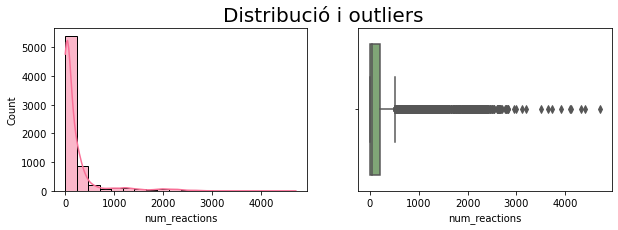

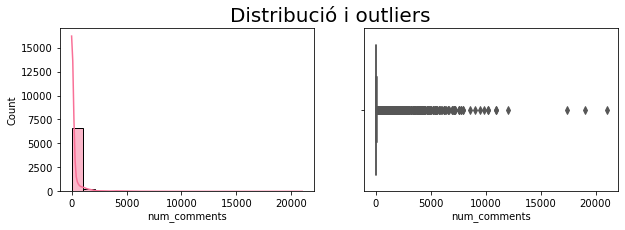

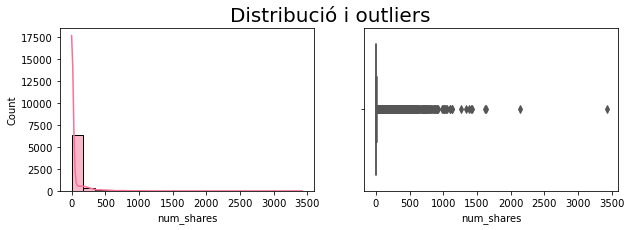

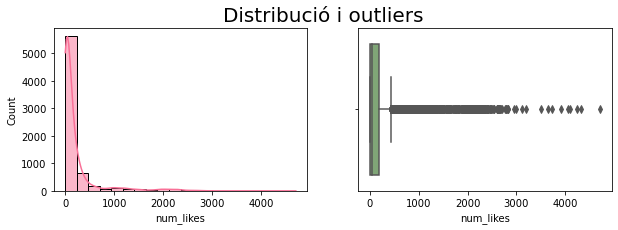

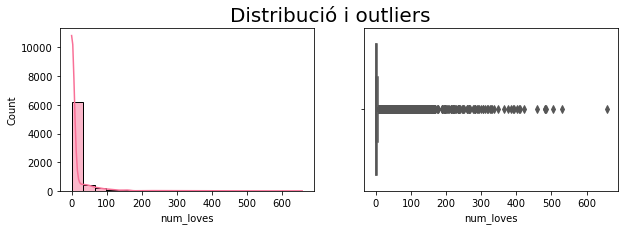

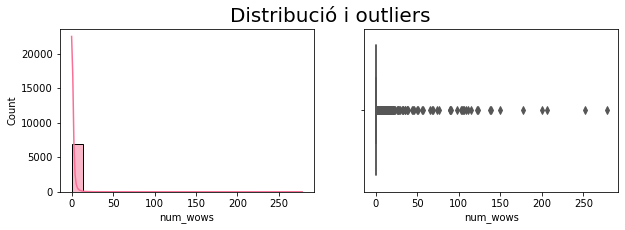

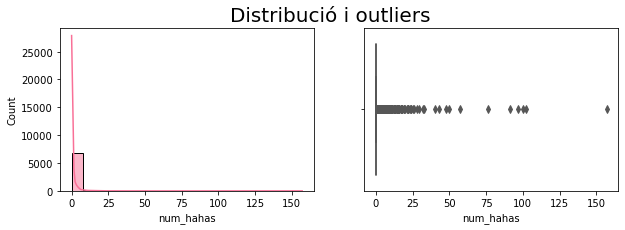

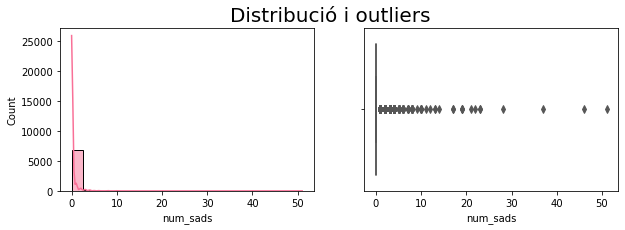

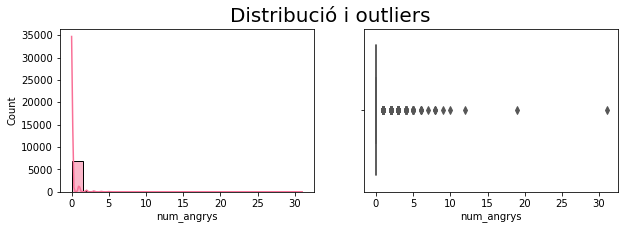

In [26]:
for atribut in df_num:
    fig, axes = plt.subplots(1,2, figsize = (10,3))
    fig.suptitle('Distribució i outliers', fontsize=20)
    sns.histplot(data=df_num, ax=axes[0],  x=df_num[atribut], bins=20, color='#F97097', kde=True)
    sns.boxplot(ax=axes[1], x =df_num[atribut], color='#7BAE6F')
    

plt.show()

Podem veure que totes les variables tenen outliers.

Com ja sabem tenim una variable categòrica **status_type**  de tipus nominal que té quatre categories. El que farem amb ella serà aplicar un procés de dummificació i així poder aplicar un model de machine learning posteriorment.

In [27]:
#fem una copia del dataset original
df_base =df.copy()

df = pd.get_dummies(df, prefix= 'type', columns = ["status_type"])
df.head(10)

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,type_link,type_photo,type_status,type_video
0,529,512,262,432,92,3,1,1,0,0,0,0,1
1,150,0,0,150,0,0,0,0,0,0,1,0,0
2,227,236,57,204,21,1,1,0,0,0,0,0,1
3,111,0,0,111,0,0,0,0,0,0,1,0,0
4,213,0,0,204,9,0,0,0,0,0,1,0,0
5,217,6,0,211,5,1,0,0,0,0,1,0,0
6,503,614,72,418,70,10,2,0,3,0,0,0,1
7,295,453,53,260,32,1,1,0,1,0,0,0,1
8,203,1,0,198,5,0,0,0,0,0,1,0,0
9,170,9,1,167,3,0,0,0,0,0,1,0,0


Doncs, ara aplicarem Robust Scaler per fer la estandarització de les variables numèriques.

In [28]:
from sklearn.preprocessing import RobustScaler

df_rob = ['num_reactions', 'num_comments',
       'num_shares', 'num_likes', 'num_loves', 'num_wows', 'num_hahas',
       'num_sads', 'num_angrys']

robs = preprocessing.RobustScaler().fit(df[df_rob])
df[df_rob] = robs.transform(df[df_rob])

df.head()

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,type_link,type_photo,type_status,type_video
0,2.366834,23.090909,65.50,2.272727,30.666667,3.0,1.0,1.0,0.0,0,0,0,1
1,0.462312,-0.181818,0.00,0.563636,0.000000,0.0,0.0,0.0,0.0,0,1,0,0
2,0.849246,10.545455,14.25,0.890909,7.000000,1.0,1.0,0.0,0.0,0,0,0,1
3,0.266332,-0.181818,0.00,0.327273,0.000000,0.0,0.0,0.0,0.0,0,1,0,0
4,0.778894,-0.181818,0.00,0.890909,3.000000,0.0,0.0,0.0,0.0,0,1,0,0


In [29]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
num_reactions,6999.0,0.839169,2.275783,-0.291457,-0.206030,0.0,0.793970,23.376884
num_comments,6999.0,10.070549,40.579228,-0.181818,-0.181818,0.0,0.818182,953.909091
num_shares,6999.0,10.064652,33.011726,0.000000,0.000000,0.0,1.000000,856.000000
num_likes,6999.0,0.926950,2.663941,-0.345455,-0.242424,0.0,0.757576,28.200000
num_loves,6999.0,4.250512,13.368957,0.000000,0.000000,0.0,1.000000,219.000000
num_wows,6999.0,1.252893,8.725551,0.000000,0.000000,0.0,0.000000,278.000000
num_hahas,6999.0,0.697957,3.970912,0.000000,0.000000,0.0,0.000000,157.000000
num_sads,6999.0,0.232605,1.481105,0.000000,0.000000,0.0,0.000000,51.000000
num_angrys,6999.0,0.110159,0.688582,0.000000,0.000000,0.0,0.000000,31.000000
type_link,6999.0,0.009001,0.094454,0.000000,0.000000,0.0,0.000000,1.000000


Ara que ja tenim les variables escalades i estandaritzades mirarem com es veuen en un boxplot.

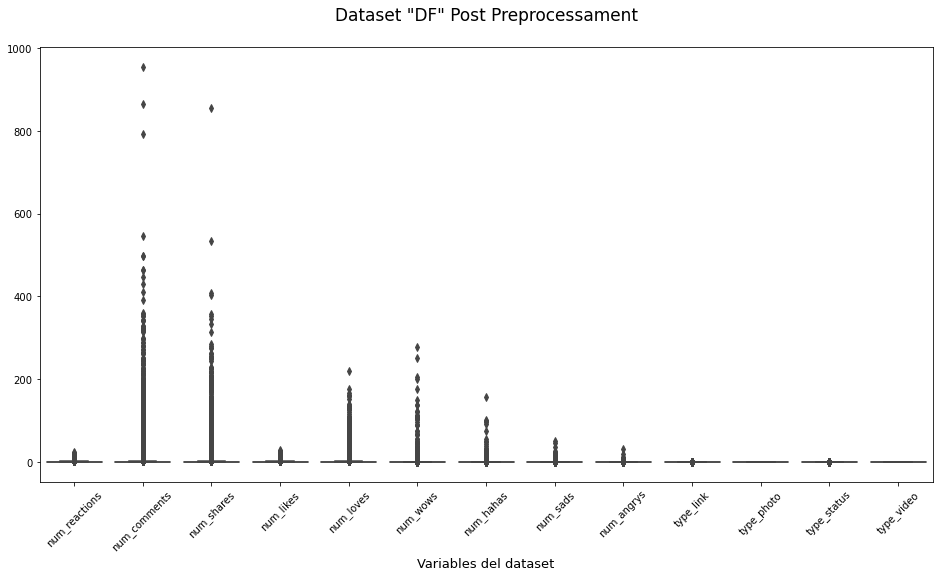

In [30]:
plt.figure(figsize=(16, 8))
sns.boxplot(data=df)
plt.title('Dataset "DF" Post Preprocessament\n', fontsize = 17)
plt.xticks(rotation=45)
plt.xlabel('Variables del dataset', fontsize = 13)
plt.show()

### Anàlisi de components principals - PCA

Ara intentarem transformar el conjunt de variables originals del nostre dataset en un nou conjunt de variables que seràn els components principals. Aquesta tècnica ens ajudarà com un anàlisi exploratori de les dades i interpretació de resultats abans d'aplicar models d'aprenentatge automatitzat.
Entre els beneficis que té fer l'anàlisi de components principals podem afegir la disminució de la dimensionalitat per a ajudar a simplificar i visualitzar les dades de manera més efectiva, millora la eficiència i el rendiment dels models posteriors i també ajuda a eliminar correlacions no desitjades o redundants en les dades originals.

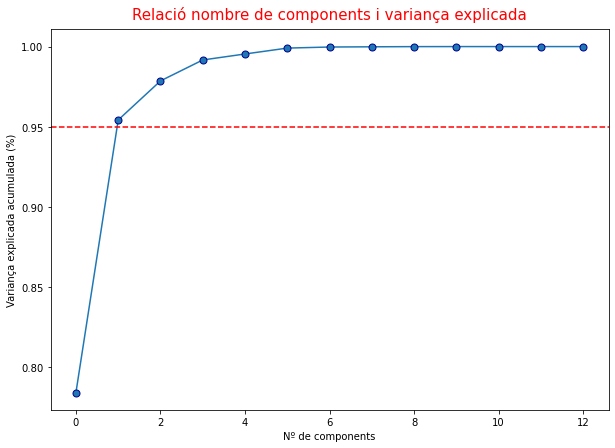

In [31]:
from sklearn.decomposition import PCA

pca = PCA().fit(df)
plt.figure(figsize = (10, 7))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker = "o", markersize=7, markeredgecolor='darkblue')
plt.axhline(0.95, color = "red", linestyle = "--")

plt.xlabel('Nº de components')
plt.ylabel('Variança explicada acumulada (%)')
plt.title("Relació nombre de components i variança explicada", fontsize=15, pad=10, color='red')

plt.show()

Hem ajustat el model PCA a les dades del nostre dataset, calculant i almacenant tot en una variable anomenada "pca" per al seu posterior ús.

La gràfica anterior ens presenta quanta variança del dataset s'explica utilitzant components principals. Si ens fixem, a mida que augmentem el nombre de components anem acumulant percentatge de variança acumulada. En el nostre cas volem desenvolupar l'anàlisi amb no menys d'un 95% de variança explicada, dit d'una altre manera no volem perdre més del 5% de l'informació original. Hem fixat la línia de la variança al 95% en color vermell perquè ens indiqui a partir de quants components podem aconseguir el nostre objectiu. Podem veure que a partir de dos components estaríem aconseguint l'explicació desitjada. No obstant això, farem el càlcul perquè ens digui el nombre de components principals que hem de fer servir segons el nostre objectiu (95%).

Ara que ja tenim el nostre model PCA ajustat procedirem a accedir els seus atributs o mètodes.

Consultem per al nostre objectiu del 95% de variança explicada.

In [32]:
pca = PCA(.95).fit(df)
print("El nombre de PCA per un 95% de variança és:", pca.n_components_)
print("Els Percentatges de variança acumulada explicada amb 2 PCA's és:", np.cumsum(pca.explained_variance_ratio_))

El nombre de PCA per un 95% de variança és: 2
Els Percentatges de variança acumulada explicada amb 2 PCA's és: [0.78422447 0.95422252]


Hem vist que amb 1 component principal el nostre objectiu no es compleix (només arriba el 78%). Però amb dos supera el 95%, per tant continuarem amb aquesta quantitat.

Ara el que farem serà transformar les nostres dades del dataset en les coordenades dels components principals. Una vegada  haguem fet això, visualitzarem l'informació en un nou dataframe.

In [33]:
df_pca = pd.DataFrame(pca.transform(df), columns=["PCA1", "PCA2"], index=df.index)
df_pca.head(10)


,PCA1,PCA2
0,48.146219,39.281738
1,-14.876282,-2.242583
2,3.375964,3.441262
3,-14.880365,-2.249211
4,-14.270582,-1.396058
5,-14.268003,-1.786538
6,22.841430,1.439380
7,11.242356,-2.364494
8,-14.502368,-1.797471
9,-14.207958,-2.035741


In [68]:
df_pca.describe().T.round(2)

,count,mean,std,min,25%,50%,75%,max
PCA1,6999.0,0.0,48.69,-14.89,-14.83,-14.53,-12.95,759.27
PCA2,6999.0,0.0,22.67,-559.18,-2.33,-2.26,-1.75,594.72


### Model K-Means

L'objectiu del algorisme K-means és particionar les dades en k-grups a través d'un mètode no supervisat. Aixì podem trobar patrons que ens serveixin per interpretar les dades d'accodr el nostres objetcius.

Abans de fer servir el model K-means hem de trobar el nombre òptim de grups o clusters per l'algorisme. Per això farem servir el mètode del 'Colze' o 'Elbow'. El punt del colze és aquell que ens diu que afegir més clusters no proporciona una millora significativa en el model. Abans d'plicar aquest mètode hem de tenir en compte dos conceptes importants. El primer és el "WCSS" o Within-Cluster Sum of Squares o suma dels quadrats de les distàncies intraclusters i el segon que surt del anterior és el "SSE" o Sum of Squared Errors o la suma dels errors quadrats dins de cada cluster.

El "SSE" el farem servir directament perquè és un indicador de la qualitat del agrupament realitzat pel algoritme k-means. D'questa la idea és seleccionar un nombre de clusters que minimitzi el SSE.

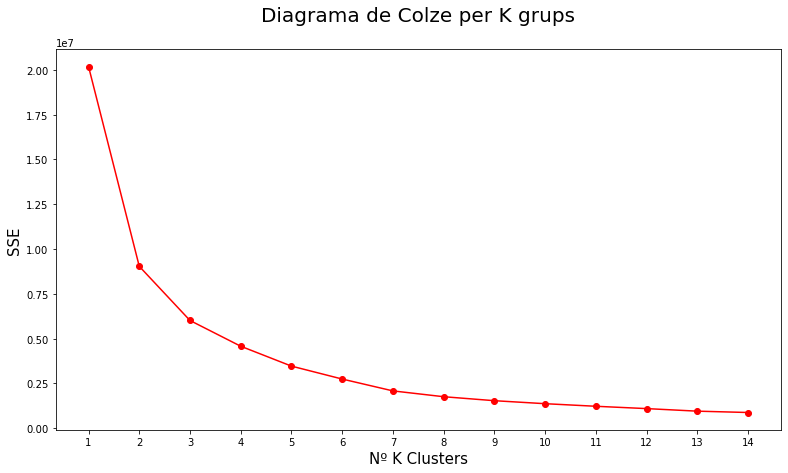

In [34]:
from sklearn.cluster import KMeans

grups = range(1, 15)
SSE = []

for i in range(1, 15):
    
    model = KMeans(n_clusters=i)     
    model.fit(df_pca)
    SSE.append(model.inertia_)
    
plt.figure(figsize = (13, 7))
plt.title('Diagrama de Colze per K grups\n', fontsize=20)
plt.plot(grups, SSE, '-o', color='red')
plt.xlabel('Nº K Clusters', fontsize=15)
plt.ylabel('SSE', fontsize=15)
plt.xticks(grups)
plt.show()

In [35]:
from kneed import KneeLocator

kl = KneeLocator(grups, SSE, curve="convex", direction="decreasing")
kl.elbow

3

Com hem pogut veure, amb tres cluster ja es comença a produir un canvi de pendent i la corba comença a mantenir un pendent regular. Això ens indique que aquest pot ser un bon punt per definir clusters.

Ara instanciarem el model K-Means amb els tres clusters i una seed=42 (Pas 1). Després ajustarem el model (Pas 2), farem la predicció amb els PCA fets abans(Pas 3) i finalment afegirem un nou camp el datsaset original (sense preporcessar) amb els clusters del model K-Means (Pas 4). Tot aixó per poder mirar com es comporten els cluster amb les variables originals.

In [36]:
# Pas 1
km = KMeans(n_clusters=3, random_state=42)
# Pas 2
km.fit(df_pca)

KMeans(n_clusters=3, random_state=42)

In [37]:
# Pas 3
y_pred = km.predict(df_pca)
y_pred

array([1, 0, 0, ..., 0, 0, 0])

In [38]:
# Pas 4
df_base['k_grups'] = y_pred

df_base.head()

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,k_grups
0,video,529,512,262,432,92,3,1,1,0,1
1,photo,150,0,0,150,0,0,0,0,0,0
2,video,227,236,57,204,21,1,1,0,0,0
3,photo,111,0,0,111,0,0,0,0,0,0
4,photo,213,0,0,204,9,0,0,0,0,0


Com que ja tenim els grups fets podems llavors fer gràfiques que ens diguen com es distribueixen les dades segons les nostres variables incials.

### Graficant les variables

Per començar, mirarem com es distribueixen les variables numèriques del nostra dataset original en relació als k-grups (clusters del model K-Means). Mirarem les densitats de les dades, els seus outliers i com es distribueixen en general per grup.

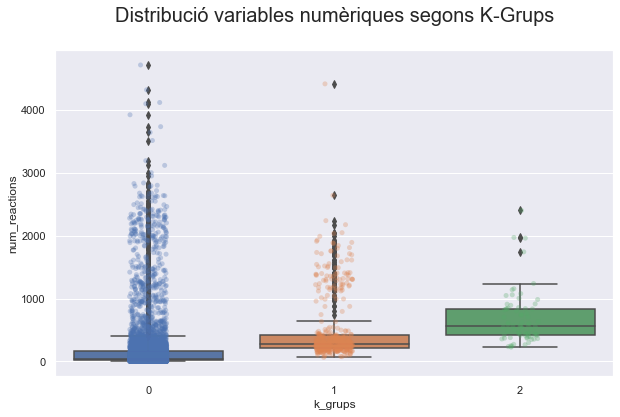

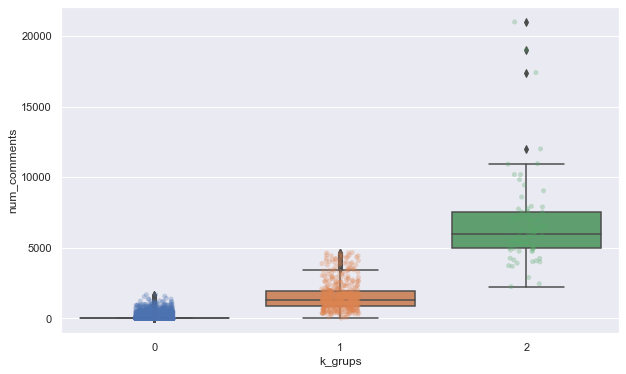

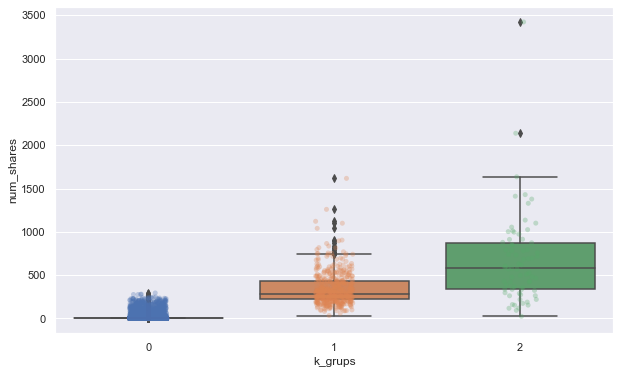

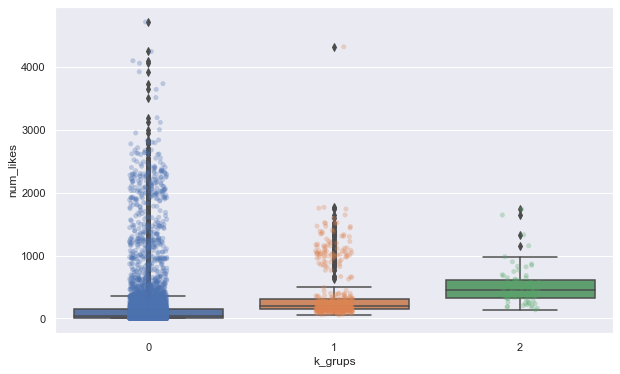

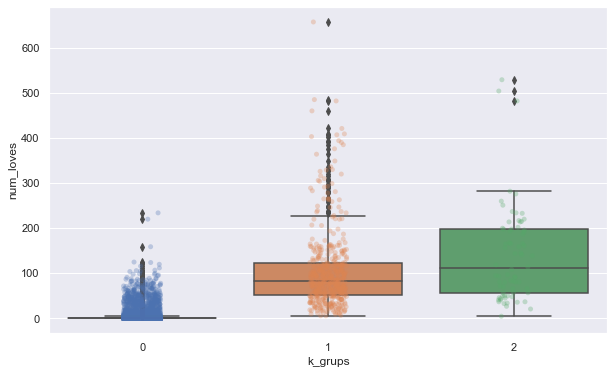

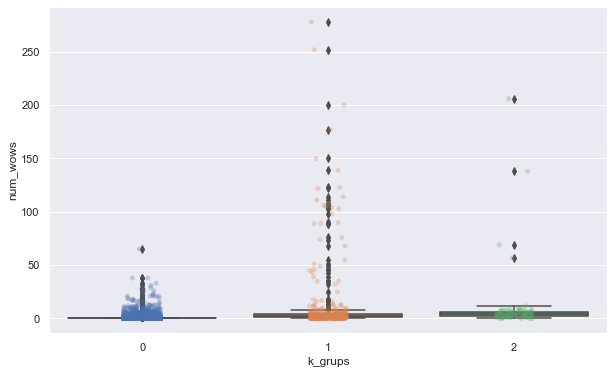

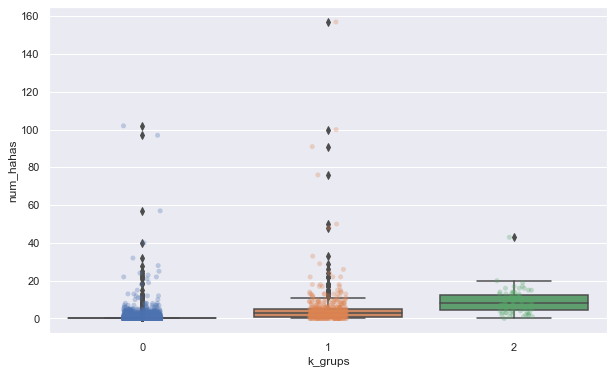

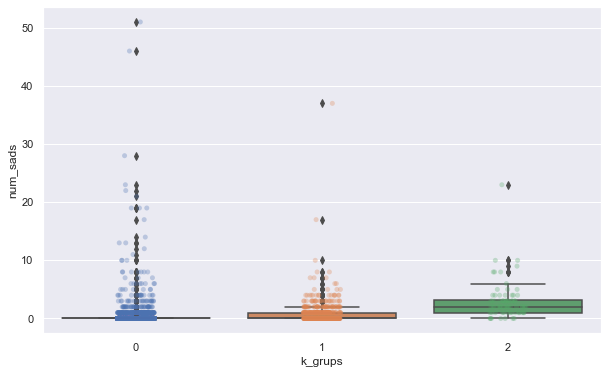

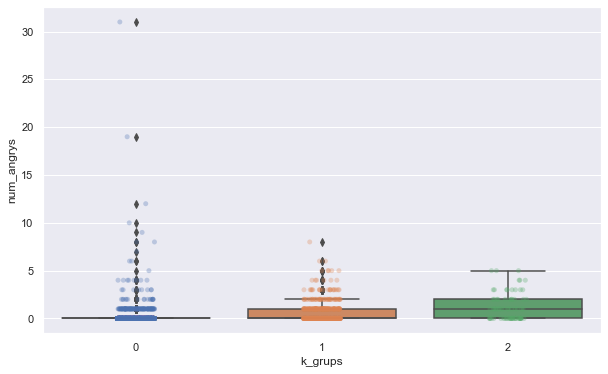

In [74]:
col = df_base.columns[1:-1]
primer_plot = True

for i in col:
    plt.figure()
    plt.tight_layout()
    sns.set(rc={"figure.figsize":(10, 6)})
    plt.gca().set(xlabel= i, ylabel='Frequency')
    
    if primer_plot:
        plt.title('Distribució variables numèriques segons K-Grups\n', fontsize=20)
        primer_plot = False
    
    sns.boxplot(x='k_grups', y=i, data=df_base)
    sns.stripplot(x='k_grups', y=i, data=df_base, alpha=0.3)


Ara observarem la distribució de les dades categòriques del nostre dataset segons cada cluster o k-Grup definit. Però abans, mirarem estadísticament la freqüència general de les dades per a tots el K-grups.

In [40]:
df_base['k_grups'].value_counts()

0    6452
1     475
2      72
Name: k_grups, dtype: int64

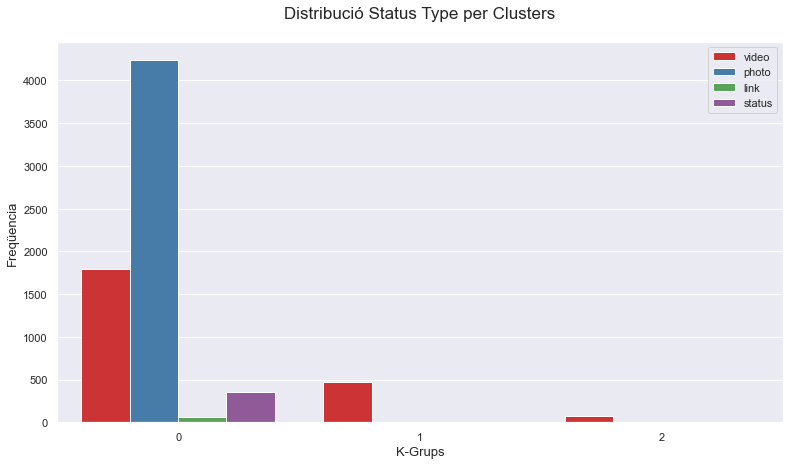

In [70]:
plt.figure(figsize = (13, 7))

sns.countplot(x="k_grups", hue="status_type", data=df_base, palette="Set1")
plt.title("Distribució Status Type per Clusters\n", fontsize=17)
plt.ylabel("Freqüencia", fontsize=13)
plt.xlabel("K-Grups", fontsize=13)
plt.legend(loc='upper right')

plt.show()

Ara farem una última gràfica on veurem la dispersión de les dades dels components principals segons cada cluster del nostre últim model. A més a més afegirem els centroides dels 3 grups dels nostres k-grups. La idea és observar com es composen els tres grups, creure com es la desnitat del agrupament i com és l'ajustament d'aquests centroides dins del seu grup corresponent.

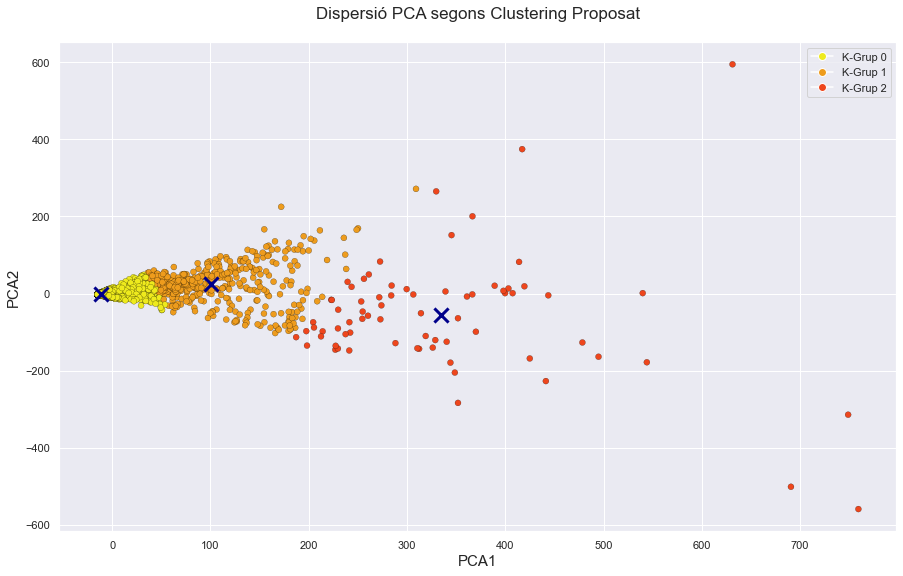

In [78]:
from matplotlib.colors import ListedColormap

centr = km.cluster_centers_
colors = ListedColormap(['#EEEA1D', '#EE9C1D', '#EE461D'])
punts_legend = [plt.Line2D([0], [0], marker='o', color='w', label='K-Grup 0', markerfacecolor='#EEEA1D', markersize=8),
                 plt.Line2D([0], [0], marker='o', color='w', label='K-Grup 1', markerfacecolor='#EE9C1D', markersize=8),
                 plt.Line2D([0], [0], marker='o', color='w', label='K-Grup 2', markerfacecolor='#EE461D', markersize=8)]


plt.figure(figsize = (15, 9))
plt.scatter(df_pca.iloc[:, 0], df_pca.iloc[:, 1], c=y_pred, cmap=colors, edgecolors='black', linewidths=0.2)
plt.scatter(centr[:, 0], centr[:, 1], marker='x', s=200, linewidths=3, color='darkblue')
plt.title('Dispersió PCA segons Clustering Proposat\n', fontsize=17)
plt.legend(handles=punts_legend)
plt.xlabel('PCA1', fontsize=15)
plt.ylabel('PCA2', fontsize=15)

plt.show()

### Comentaris de les gràfiques

Podem veure que en general el cluster "0" és aquell que recull la major quantit de data sens dubte. Les emocions o reaccions positives tenen una dispersió força similar, encara que els likes són clarament predominants (tot agrupat en el cluster 0). Però, podem veure unes densitats molt interessants (més baixes per descomptat que en el cluster 1) a les emociones negatives a les variables "sad" i "angry" en el cluster 1. Podem veure outliers en tots els grups (menys al cluster 2 "Angrys"), on entre el grup 0 i el grup 1 reparteixen aquestes tipus de dades. Finalment podem dir que el grup 3 és el menys relevant perque porta una quantit de dades baixes i amb poca densitat.

Per un altre banda, si mirem el gràfic de les dades categóriques del "CountPlot" podem veure una predominància molt gran del grup 0 per sobre dels altres. Las Photos són les que dominen el dataset (grup 0), però d'un altre banda veiem que els videos són presents en tots el grups (0, 1 i 2).

Si ens fixem en l'ultim gràfic veiem una imatge molt interessant on es relaciona el comportament de les dades dels PCA's, ensenyant la seva dispersió a través dels 3 grups del model K-means. Aquí podem veure que hi ha una clara predominància del K-Grup 0 amb la més alta densitat de dades el voltant dels valors 0. El centroide s'ubica més a l'inici perquè és on s'grupa la major quantit de dades (en general de 0 a 100 agafant el grup 0 i 1). No obstant aixó veiem com el grup 1 porta el seu centroide localitzat més al centre geométric del seu grup igualment que ho fa el centroide del grup 2. Això pot ser perquè les dades tenen una dispersió més important cap a valors més elevats, i no tenen aquesta densitat tant forta el voltant dels valors 0 com en el grup 1.

Podem dir que efectivament tant els compoents principals com l'algorisme K-means amb els seus clusterings, permetren la simplificació d'un dataset (dins d'altres coses), de manera de trobar un comportament lógic de dades que en un inici (si ens recordem del heatmap incial) pot tornar-se sobre-correlacionat o dit d'un altre manera pot tenir massa variables que explican el mateix.

### Exercici 2

Classifica els diferents registres utilitzant l'algorisme de clustering jeràrquic.

In [81]:
import scipy.cluster.hierarchy as shc
from sklearn.cluster import AgglomerativeClustering

Farem servir el dendrograma per facilitar l'identificació del nombre óptim de cluster per l'algorisme del cluster jeràrquic. Posarem un llindar de 2.500 publicacions i mirarem quantes branques de l'arbre curta. Aixì doncs, sabrem quants clusters farem servir per probar el model més endavant.  

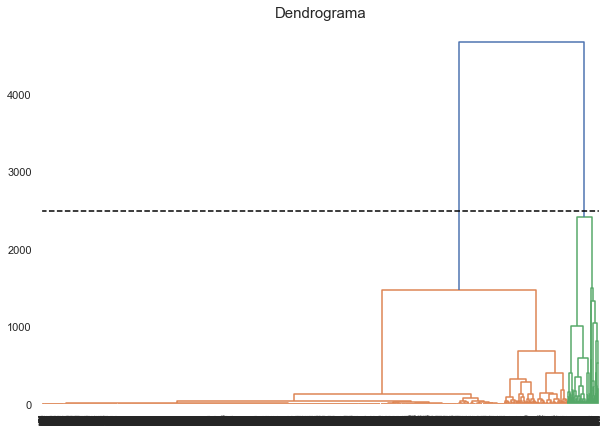

In [86]:
plt.figure(figsize=(10, 7))  
plt.title("Dendrograma", fontsize=15)  
dendro = shc.dendrogram(shc.linkage(df_pca, method='ward'))
plt.axhline(y=2500, color='black', linestyle='--')

plt.show()

### Instanciem i ajustem el model

In [88]:
agglo = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')  
agglo.fit(df_pca)

y_pred_agglo = agglo.labels_

y_pred_agglo

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [89]:
df_base['k_agglo'] = y_pred_agglo
df_base.head()

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,k_grups,k_agglo
0,video,529,512,262,432,92,3,1,1,0,1,1
1,photo,150,0,0,150,0,0,0,0,0,0,1
2,video,227,236,57,204,21,1,1,0,0,0,1
3,photo,111,0,0,111,0,0,0,0,0,0,1
4,photo,213,0,0,204,9,0,0,0,0,0,1


### Graficant les variables

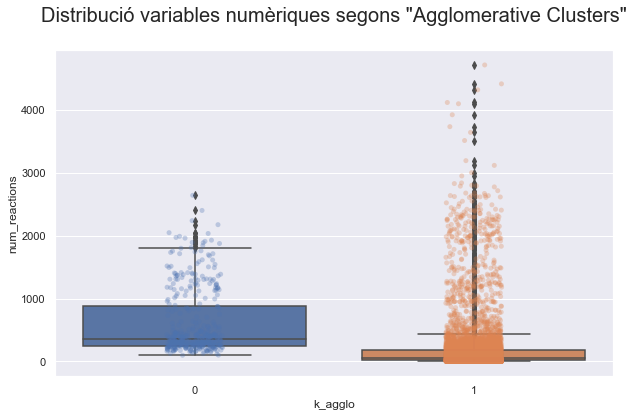

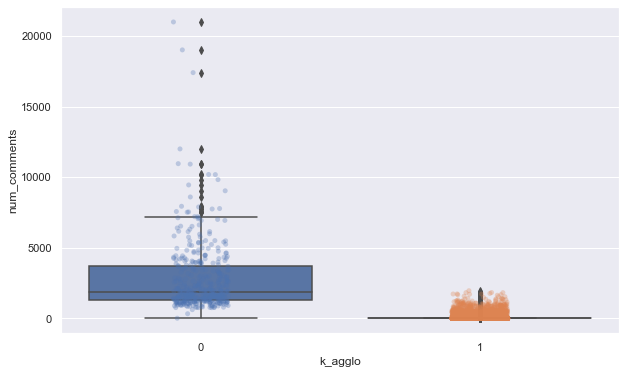

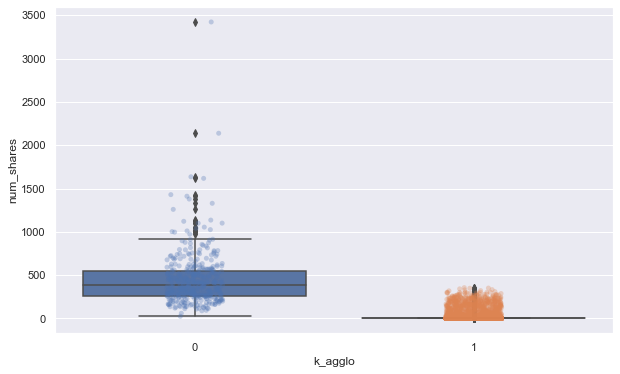

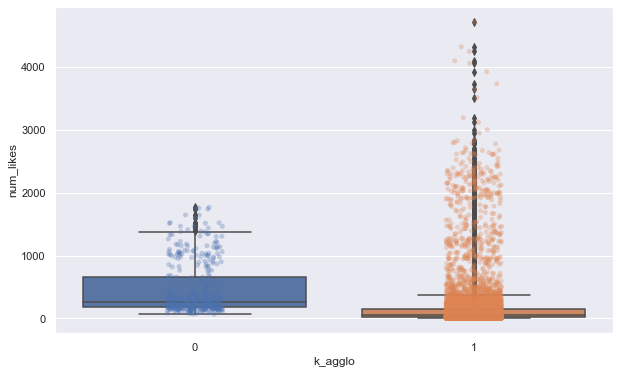

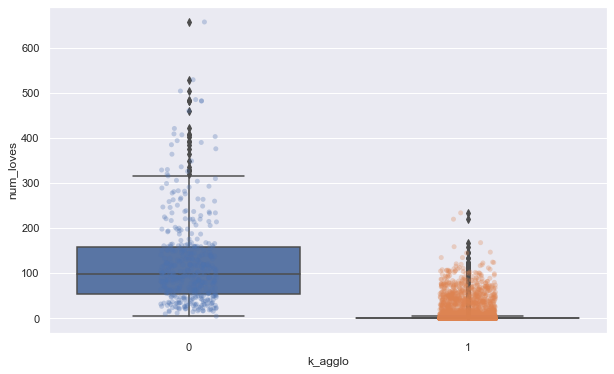

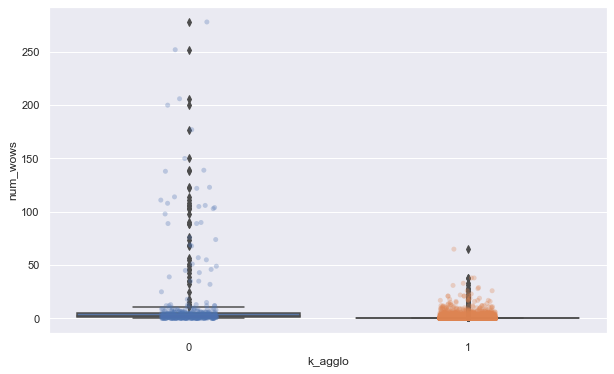

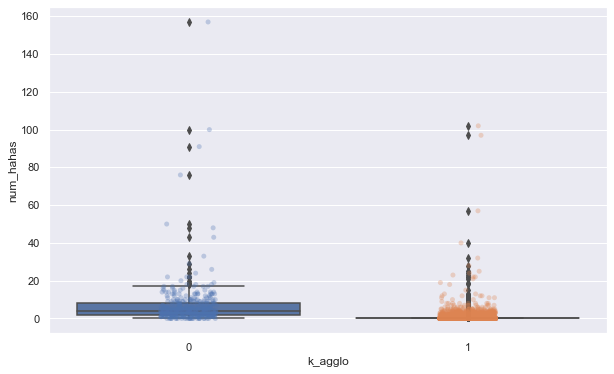

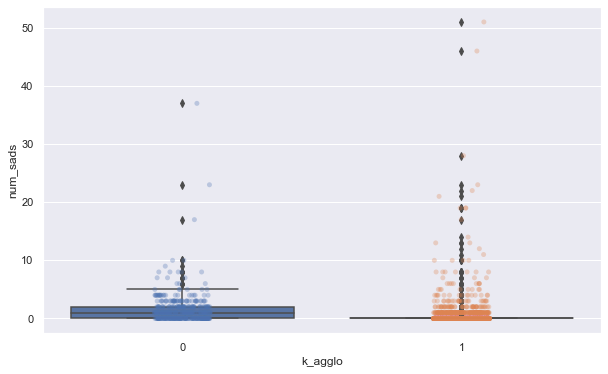

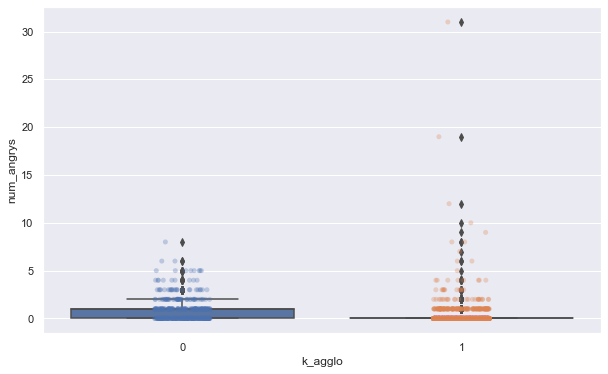

In [92]:
col = df_base.columns[1:-2]
primer_plot = True

for i in col:
    plt.figure()
    plt.tight_layout()
    sns.set(rc={"figure.figsize":(10, 6)})
    plt.gca().set(xlabel= i, ylabel='Frequency')
    
    if primer_plot:
        plt.title('Distribució variables numèriques segons "Agglomerative Clusters"\n', fontsize=20)
        primer_plot = False
    
    sns.boxplot(x='k_agglo', y=i, data=df_base)
    sns.stripplot(x='k_agglo', y=i, data=df_base, alpha=0.3)

In [90]:
df_base['k_agglo'].value_counts()

1    6602
0     397
Name: k_agglo, dtype: int64

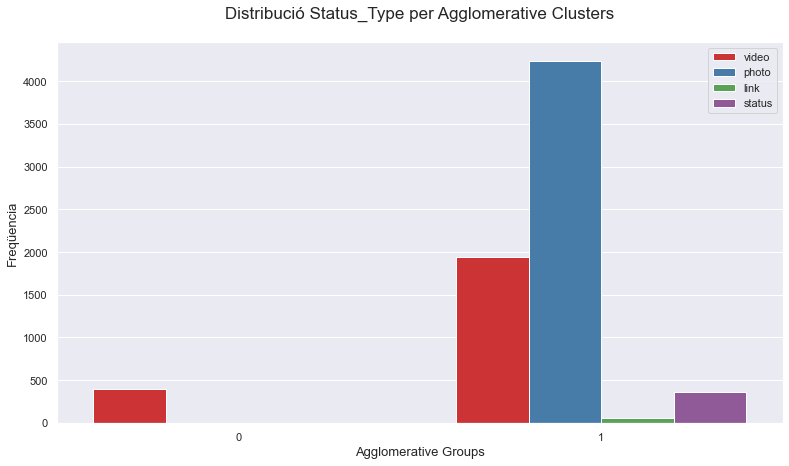

In [93]:
plt.figure(figsize = (13, 7))

sns.countplot(x="k_agglo", hue="status_type", data=df_base, palette="Set1")
plt.title("Distribució Status_Type per Agglomerative Clusters\n", fontsize=17)
plt.ylabel("Freqüencia", fontsize=13)
plt.xlabel("Agglomerative Groups", fontsize=13)
plt.legend(loc='upper right')

plt.show()

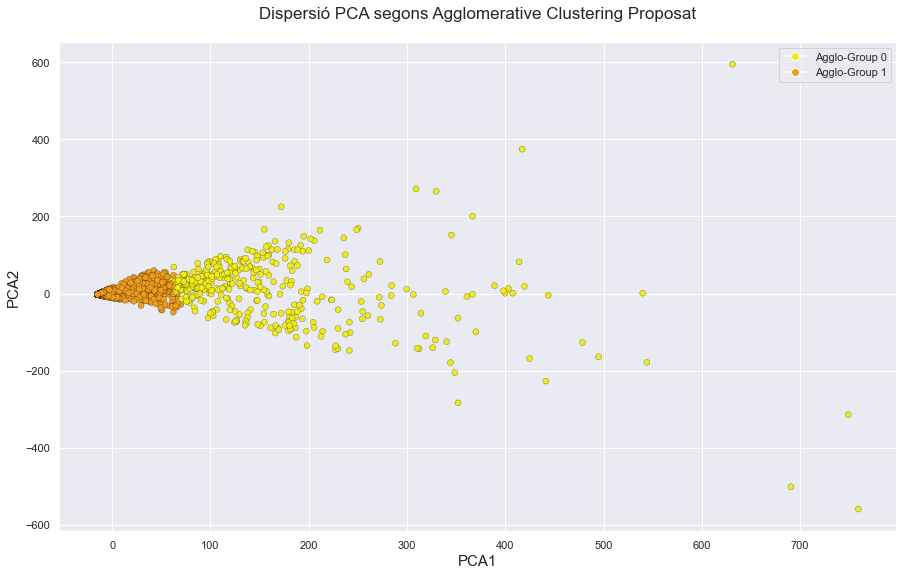

In [96]:
from matplotlib.colors import ListedColormap


colors = ListedColormap(['#EEEA1D', '#EE9C1D'])
punts_legend = [plt.Line2D([0], [0], marker='o', color='w', label='Agglo-Group 0', markerfacecolor='#EEEA1D', markersize=8),
                 plt.Line2D([0], [0], marker='o', color='w', label='Agglo-Group 1', markerfacecolor='#EE9C1D', markersize=8)]
                
plt.figure(figsize = (15, 9))
plt.scatter(df_pca.iloc[:, 0], df_pca.iloc[:, 1], c=y_pred_agglo, cmap=colors, edgecolors='black', linewidths=0.2)

plt.title('Dispersió PCA segons Agglomerative Clustering Proposat\n', fontsize=17)
plt.legend(handles=punts_legend)
plt.xlabel('PCA1', fontsize=15)
plt.ylabel('PCA2', fontsize=15)

plt.show()

### Comentaris de les gràfiques

Podriem dir que igualment com ha passat amb els grups del K-Means, un cluster s'emporta la gran majoria de les dades amb una densitat molt alta. Clarament el grup de dades més petit "agglo grup 0" té una distribució i dispersió de les dades molt més àmplia que el "agglo grup 1" encara que la seva densitat sigui menor i la seva freqüència també. Podem veure que les variables categòriques també es comporten d'una manera molt semblant que en els clusters dels K-Means.



### Exercici 3

Calcula el rendiment del clustering mitjançant un paràmetre com pot ser silhouette.

Ara evaluarem la qualitat del agrupament dels nostres clusters. Llavors mirarem a través d'una mètrica qué tant bé estan separats els clusters.

In [98]:
from sklearn.metrics import silhouette_score

km_sil = silhouette_score(df_pca, y_pred)
agglo_sil = silhouette_score(df_pca, y_pred_agglo)

print('El silhouette per el model k-means és de:', km_sil,'\nEl silhouette per el model jeràrquic és de:', agglo_sil)

El silhouette per el model k-means és de: 0.8764975986455583 
El silhouette per el model jeràrquic és de: 0.8932110685608621


Podem veure segons aquesta mètrica que el model Jeràrquic és lleument superior al K-Means. De manera general podem dir que els dos models tenen una qualitat molt bona en els seus agrupaments. Els dos models han pogut separar força bé els grups i per això les mètriques són properes a 1. En el cas del K-Means el paràmetre Silhouette ens dona 0.876 mentre que en el model Jeràrquic puja a casi 0.9.